# 可视化数据

matplotlib 的用法其实跟MATLAB差不多，因此可以借鉴MATLAB的用法来进行记忆

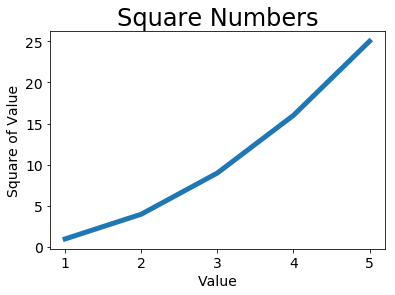

In [6]:
# mpl_squares.py
import matplotlib.pyplot as plt

input_value = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]
plt.plot(input_value, squares, linewidth=5)

# 设置图表标题，并给坐标轴加上标签
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both', labelsize=14)

plt.show()

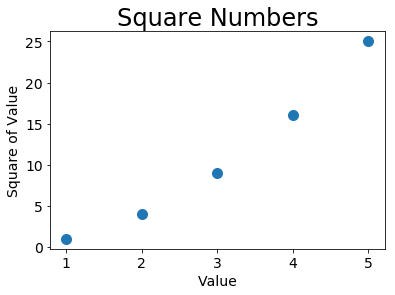

In [14]:
# scatter_squares.py
import matplotlib.pyplot as plt

x_value = [1, 2, 3, 4, 5]
y_value = [1, 4, 9, 16, 25]

plt.scatter(x_value, y_value, s=100)

# 设置图表标题并给坐标轴加上标签
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

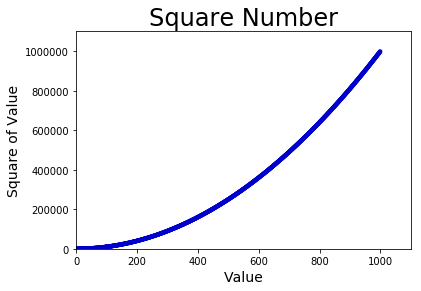

In [14]:
import matplotlib.pyplot as plt

x = list(range(1,1000))
y = [i**2 for i in x]

plt.scatter(x, y,c=(0,0,0.8), edgecolor='none', s=20)
plt.title("Square Number", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

plt.axis([0, 1100, 0, 1100000])

plt.show()

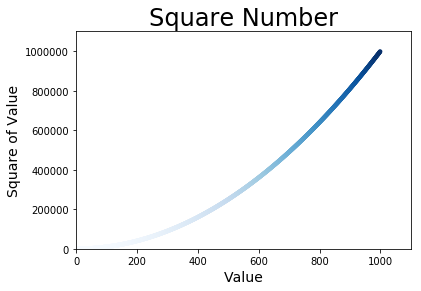

In [15]:
import matplotlib.pyplot as plt

x = list(range(1,1000))
y = [i**2 for i in x]

# 颜色映射，渐变，值小的颜色浅，值大的颜色深
plt.scatter(x, y, c=y, cmap=plt.cm.Blues, edgecolor='none', s=20)
plt.title("Square Number", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

plt.axis([0, 1100, 0, 1100000])

plt.show()

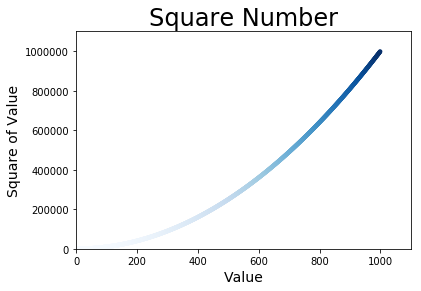

In [16]:
import matplotlib.pyplot as plt

x = list(range(1,1000))
y = [i**2 for i in x]

# 颜色映射，渐变，值小的颜色浅，值大的颜色深
plt.scatter(x, y, c=y, cmap=plt.cm.Blues, edgecolor='none', s=20)
plt.title("Square Number", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

plt.axis([0, 1100, 0, 1100000])

plt.savefig('Squareplot.png',bbox_inches='tight')

## Exercise

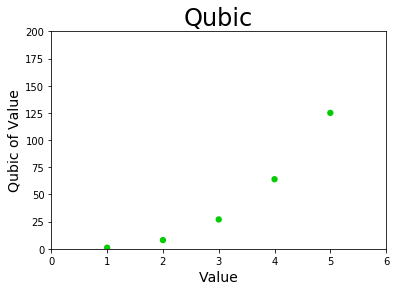

In [23]:
import matplotlib.pyplot as plt

x_value = list(range(1,6))
y_value = [x**3 for x in x_value]

plt.scatter(x_value, y_value, c=(0,0.8,0), edgecolor='none', s=40)

plt.title("Qubic", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Qubic of Value", fontsize=14)

plt.axis([0, 6, 0, 200])

plt.show()

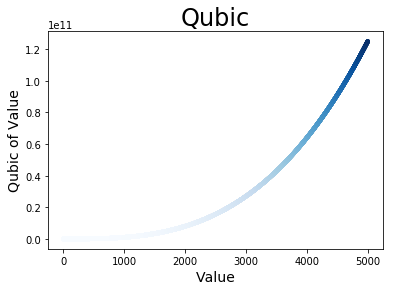

In [24]:
import matplotlib.pyplot as plt

x_value = list(range(1,5001))
y_value = [x**3 for x in x_value]

plt.scatter(x_value, y_value, c=y_value, cmap=plt.cm.Blues, edgecolor='none', s=20)

plt.title("Qubic", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Qubic of Value", fontsize=14)

plt.show()

# 随机漫步
随机运动的轨迹点

In [2]:
# random_walk.py
# RandomWalk 类
from random import choice

class RandomWalk():
    """生成随机漫步的类"""
    
    def __init__(self, num_points=5000):
        """初始化随机漫步的属性"""
        self.num_points = num_points
        
        # 所有随机漫步都始于(0, 0)
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        """计算随机漫步的所有点"""
        
        # 不断漫步直到达到点数上限
        while len(self.x_values) < self.num_points:
            # 决定x的方向和步长
            x_direction = choice([-1, 1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance
            
            # 决定y的方向和步长
            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
            
            # 拒绝原地踏步
            if x_step == 0 and y_step == 0:
                continue
            
            x_next = self.x_values[-1] + x_step
            y_next = self.y_values[-1] + y_step
            
            self.x_values.append(x_next)
            self.y_values.append(y_next)

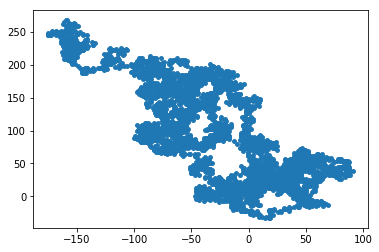

In [3]:
import matplotlib.pyplot as plt
rw = RandomWalk()
rw.fill_walk()
plt.scatter(rw.x_values, rw.y_values, s=15)
plt.show()

## 多次随机漫步

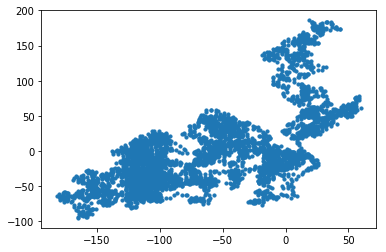

Make another walk?(y/n)y


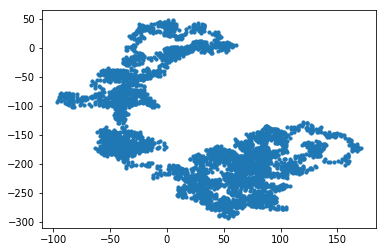

Make another walk?(y/n)n


In [4]:
import matplotlib.pyplot as plt

while True:
    rw = RandomWalk()
    rw.fill_walk()
    plt.scatter(rw.x_values, rw.y_values, s=10)
    plt.show()
    
    keep_running = input('Make another walk?(y/n)')
    if keep_running == 'n':
        break

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


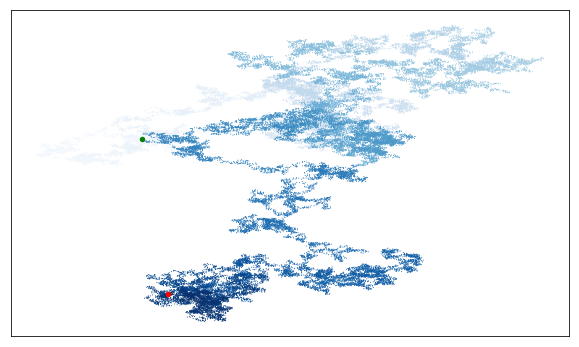

In [19]:
import matplotlib.pyplot as plt

rw = RandomWalk(50000)
rw.fill_walk()

# 设置绘图窗口的尺寸
plt.figure(figsize=(10, 6))

point_numbers = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolor='none', s=1)

# 突出起点和终点
plt.scatter(0, 0, c='green', s=20)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', s=20)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

plt.show()

# Pygal模拟掷骰子
## 创建掷骰子类

In [3]:
# die.py
from random import randint

class Die():
    """表示一个骰子的类"""
    
    def __init__(self, num_sides=6):
        """初始化类"""
        self.num_sides = num_sides
        
    def roll(self):
        """返回一个1到骰子面间的值"""
        return randint(1, self.num_sides)

## 掷骰子

In [24]:
# die_visual.py
import pygal

# 创建一个D6
die = Die()

# 掷骰子
results = []
for i in range(1000):
    result = die.roll()
    results.append(result)

# 分析每面出现的次数
frequencies = []
for value in range(1, die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# 对结果进行可视化
hist = pygal.Bar()

hist.title = "Results of rolling one D6 1000 times"
hist.x_labels = [str(value) for value in list(range(1, die.num_sides))]
hist.x_title = "Results"
hist.y_title = "Frequency"

# 添加结果到柱状图，输出结果必须是svg格式
hist.add('D6', frequencies)
hist.render_to_file('die_visual.svg')

## 掷两个骰子

In [26]:
# dice_visual.py
import pygal

die_1 = Die()
die_2 = Die()

results = []
for i in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)
    
frequencies = []
max_sides = die_1.num_sides + die_2.num_sides
for value in range(2, max_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)

hist = pygal.Bar()

hist.title = "Results of rolling two D6 1000 times"
hist.x_labels = [str(value) for value in list(range(2, max_sides+1))]
hist.x_title = "Results"
hist.y_title = "Frequency"

hist.add('2D6', frequencies)
hist.render_to_file('dice_visual.svg')

In [27]:
# dice_visual.py
import pygal

die_1 = Die()
die_2 = Die(10)

results = []
for i in range(50000):
    result = die_1.roll() + die_2.roll()
    results.append(result)
    
frequencies = []
max_sides = die_1.num_sides + die_2.num_sides
for value in range(2, max_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)

hist = pygal.Bar()

hist.title = "Results of rolling D6 and D10 1000 times"
hist.x_labels = [str(value) for value in list(range(2, max_sides+1))]
hist.x_title = "Results"
hist.y_title = "Frequency"

hist.add('D6+D10', frequencies)
hist.render_to_file('dice_visual1.svg')

## 练习

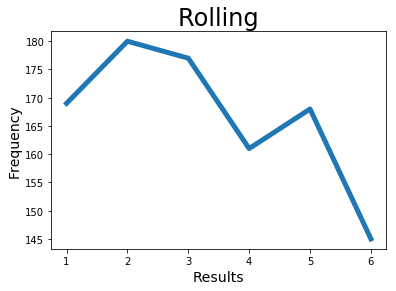

In [30]:
import matplotlib.pyplot as plt

die = Die()

results = []
for i in range(1000):
    result = die.roll()
    results.append(result)
    
frequencies = []
for value in range(1, die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)

x_values = range(1, die.num_sides+1)

plt.plot(x_values, frequencies, linewidth=5)
plt.title("Rolling", fontsize=24)
plt.xlabel("Results", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()